In [1]:
# Data Management/Investigation
import pandas as pd
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
import missingno as miss

# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
brfss = pd.read_sas('LLCP2020.XPT')

In [3]:
brfss.dtypes

_STATE      float64
FMONTH      float64
IDATE        object
IMONTH       object
IDAY         object
             ...   
_STOLDNA    float64
_VIRCOLN    float64
_SBONTIM    float64
_CRCREC1    float64
_AIDTST4    float64
Length: 279, dtype: object

combine cancer vars

new lgbtq var - combine so, trans to just a y/n

combine 1&2 for persdoc2 

race to dummy categories 

language, hlthcvr1, educag to dummy cats

create sum disability cat (incl cdassist) 

aces count 

In [4]:
#RECODING SOME DUMMIES 
def dumb_recode(item): 
    if item == 2: 
        return 0
    elif item == 1:
        return 1
    else: 
        return np.NaN

In [5]:
#health factors/conditions
brfss['EXERANY2'] = brfss['EXERANY2'].apply(dumb_recode)
brfss['_LTASTH1'] = brfss['_LTASTH1'].apply(dumb_recode)
brfss['ADDEPEV3'] = brfss['ADDEPEV3'].apply(dumb_recode)

#non dummy to include: smoking, drinks/wk, diabetes, bmi, genhealth
brfss["GENHLTH"]=brfss["GENHLTH"].replace([7,9], np.NaN)
brfss["_SMOKER3"]=brfss["_SMOKER3"].replace(9, np.NaN)
brfss["_DRNKWK1"]=brfss["_DRNKWK1"].replace(99900, np.NaN)

#also add cancer 


#ACEs recode 

def ace_recode(var):
    if var == 2.0 or var ==3.0: 
        return 1
    else:
        return 0
    

        
#brfss[['ACEDEPRS','ACEDRINK','ACEDRUGS','ACEPRISN','ACEDIVRC']] = brfss[['ACEDEPRS','ACEDRINK','ACEDRUGS','ACEPRISN','ACEDIVRC']].apply(ace_recode2)
#brfss[['ACEPUNCH','ACEHURT1','ACESWEAR','ACETOUCH','ACETTHEM','ACEHVSEX']] = brfss[['ACEPUNCH','ACEHURT1','ACESWEAR','ACETOUCH','ACETTHEM','ACEHVSEX']].apply(ace_recode)



In [6]:
#health access vars 

#check NAs 
brfss["CHECKUP1"]=brfss["CHECKUP1"].replace([7,8,9], np.NaN)
brfss["LASTDEN4"]=brfss["LASTDEN4"].replace([7,8,9], np.NaN)

#rearranging so having a doctor = 1 and not having a regular doctor = 0
brfss.PERSDOC2[brfss.PERSDOC2==2] = 1
brfss.PERSDOC2[brfss.PERSDOC2==3] = 0
brfss["PERSDOC2"]=brfss["PERSDOC2"].replace([7,9], np.NaN)

              
brfss['MEDCOST'] = brfss['MEDCOST'].apply(dumb_recode)
brfss['HLTHPLN1'] = brfss['HLTHPLN1'].apply(dumb_recode)




<ipython-input-6-1a1b9109a4ea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-6-1a1b9109a4ea>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
#demographic dummies
brfss['VETERAN3'] = brfss['VETERAN3'].apply(dumb_recode)
brfss['SEXVAR'] = brfss['SEXVAR'].apply(dumb_recode)
brfss['_URBSTAT'] = brfss['_URBSTAT'].apply(dumb_recode)
#recoding male/female sexual orientation and transgender var to lgbtq dummy var
brfss['lgbtq'] = np.where(brfss['SOMALE']==1,1, np.where(brfss['SOMALE']==3,1, np.where(brfss['SOMALE']==4,1, np.where(brfss['SOFEMALE']==1,1, np.where(brfss['SOFEMALE']==3,1, np.where(brfss['SOFEMALE']==4,1, np.where(brfss['TRNSGNDR']==1,1, np.where(brfss['TRNSGNDR']==2,1,  np.where(brfss['TRNSGNDR']==3,1,0)))))))))
#turning all disability markers into single disability dummy 
brfss['dis'] = np.where(brfss['DEAF']==1,1, np.where(brfss['BLIND']==1,1, np.where(brfss['DECIDE']==1,1, np.where(brfss['DIFFWALK']==1,1, np.where(brfss['DIFFDRES']==1,1, np.where(brfss['DIFFALON']==1,1, np.where(brfss['CDASSIST']<3, 1, 0)))))))

#missing codes
brfss["_RACE"]=brfss["_RACE"].replace(9, np.NaN)
brfss["MARITAL"]=brfss["MARITAL"].replace(9, np.NaN)
#brfss["QSTLANG"]=brfss["QSTLANG"].replace(20, np.NaN)
#brfss["ENGSPK"]=brfss["QSTLANG"].replace(2, 0)
brfss["_EDUCAG"]=brfss["_EDUCAG"].replace(9, np.NaN)
brfss["EMPLOY1"]=brfss["EMPLOY1"].replace(9, np.NaN)
brfss["RENTHOM1"]=brfss["RENTHOM1"].replace([7,9], np.NaN)
brfss["INCOME2"]=brfss["INCOME2"].replace([77,99], np.NaN)
                                       
                                       
#race, marital status, homeownership, employment, language need to be converted to categorical dummies 
                                       

In [8]:
brfss2 = brfss[['_STATE','VETERAN3','SEXVAR','_URBSTAT','lgbtq','dis','_RACE','_AGE_G','MARITAL','_EDUCAG','EMPLOY1','RENTHOM1','INCOME2','PERSDOC2','CHECKUP1','LASTDEN4','MEDCOST','HLTHPLN1','GENHLTH','_SMOKER3','_DRNKWK1','EXERANY2','_LTASTH1','ADDEPEV3']]
brfss2

,_STATE,VETERAN3,SEXVAR,_URBSTAT,lgbtq,dis,_RACE,_AGE_G,MARITAL,_EDUCAG,...,CHECKUP1,LASTDEN4,MEDCOST,HLTHPLN1,GENHLTH,_SMOKER3,_DRNKWK1,EXERANY2,_LTASTH1,ADDEPEV3
0,1.0,0.0,0,1.0,0,1,1.0,5.0,2.0,4.0,...,4.0,1.0,1.0,0.0,2.0,1.0,5.397605e-79,1.0,0.0,1.0
1,1.0,0.0,0,1.0,0,0,2.0,6.0,3.0,4.0,...,1.0,1.0,1.0,1.0,3.0,NaN,NaN,1.0,0.0,1.0
2,1.0,0.0,0,1.0,0,0,2.0,6.0,1.0,3.0,...,1.0,1.0,0.0,1.0,3.0,4.0,5.397605e-79,1.0,1.0,0.0
3,1.0,0.0,0,1.0,0,0,1.0,6.0,3.0,2.0,...,2.0,NaN,0.0,1.0,1.0,4.0,5.397605e-79,0.0,1.0,0.0
4,1.0,0.0,0,1.0,0,0,1.0,6.0,3.0,4.0,...,1.0,NaN,0.0,1.0,2.0,4.0,5.397605e-79,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401953,72.0,0.0,0,NaN,0,1,8.0,4.0,2.0,3.0,...,2.0,2.0,0.0,0.0,3.0,4.0,5.397605e-79,1.0,1.0,1.0
401954,72.0,0.0,0,NaN,0,0,8.0,2.0,1.0,1.0,...,3.0,1.0,0.0,1.0,3.0,4.0,5.397605e-79,0.0,1.0,0.0
401955,72.0,0.0,0,NaN,0,0,8.0,6.0,1.0,2.0,...,2.0,1.0,0.0,1.0,3.0,4.0,5.397605e-79,1.0,1.0,0.0
401956,72.0,0.0,1,NaN,0,1,8.0,5.0,1.0,4.0,...,1.0,1.0,0.0,1.0,3.0,NaN,2.000000e+02,1.0,1.0,0.0


In [9]:
qoc = pd.read_csv("QOC.csv")
qoc.dtypes

state                                              object
domain                                             object
reporting_program                                  object
measure_name                                       object
measure_abbreviation                               object
measure_type                                       object
rate_definition                                    object
ffy                                                 int64
population                                         object
methodology                                        object
state_rate                                         object
number_of_states_reporting                          int64
median                                            float64
bottom_quartile                                   float64
top_quartile                                      float64
notes                                              object
source                                             object
statespecific_

In [10]:
qoc['state_rate'] =qoc['state_rate'].replace(["NR","DS","#"], np.NaN)
qoc['state_rate'] =pd.to_numeric(qoc.state_rate)

In [11]:
new = pd.pivot_table(qoc, values = 'state_rate', index = ['state'], columns = ["rate_definition"])

In [12]:
#making negative the columns where lower is better. for reasons 
new["Percentage Without Cancer who Received Prescriptions for Opioids with an Average Daily Dosage Greater than or Equal to 90 Morphine Milligram Equivalents Over 90 Consecutive Days or More: Ages 18 to 64"]= new["Percentage Without Cancer who Received Prescriptions for Opioids with an Average Daily Dosage Greater than or Equal to 90 Morphine Milligram Equivalents Over 90 Consecutive Days or More: Ages 18 to 64"]*-1
new['Inpatient Hospital Admissions for Chronic Obstructive Pulmonary Disease (COPD) or Asthma per 100,000 Beneficiary Months: Ages 40 to 64']=new['Inpatient Hospital Admissions for Chronic Obstructive Pulmonary Disease (COPD) or Asthma per 100,000 Beneficiary Months: Ages 40 to 64']*-1
new['Inpatient Hospital Admissions for Asthma per 100,000 Beneficiary Months: Ages 18 to 39']=new['Inpatient Hospital Admissions for Asthma per 100,000 Beneficiary Months: Ages 18 to 39']*-1
new['Inpatient Hospital Admissions for Diabetes Short-Term Complications per 100,000 Beneficiary Months: Ages 18 to 64']=new['Inpatient Hospital Admissions for Diabetes Short-Term Complications per 100,000 Beneficiary Months: Ages 18 to 64']*-1
new['Inpatient Hospital Admissions for Heart Failure per 100,000 Beneficiary Months: Ages 18 to 64']=new['Inpatient Hospital Admissions for Heart Failure per 100,000 Beneficiary Months: Ages 18 to 64']*-1
new['Percentage with Diabetes (Type 1 or Type 2) who had Hemoglobin A1c in Poor Control (>9.0%): Ages 18 to 64']=new['Percentage with Diabetes (Type 1 or Type 2) who had Hemoglobin A1c in Poor Control (>9.0%): Ages 18 to 64']*-1
new['Ratio of Observed All-Cause Readmissions to Expected Readmissions: Ages 18 to 64']=new['Ratio of Observed All-Cause Readmissions to Expected Readmissions: Ages 18 to 64']*-1
new['Percentage with Concurrent Use of Prescription Opioids and Benzodiazepines: Ages 18 to 64']=new['Percentage with Concurrent Use of Prescription Opioids and Benzodiazepines: Ages 18 to 64']*-1

In [13]:
new2=new.apply(pd.qcut, q=5 , labels = False)

In [14]:
new2['avgqoc']= new2.mean(axis=1,skipna=True)
new2['avgqoc'].value_counts()

1.750000    2
1.108108    1
1.352941    1
1.704545    1
2.718750    1
1.909091    1
2.577778    1
1.812500    1
2.925000    1
0.948718    1
2.600000    1
2.187500    1
2.142857    1
1.255814    1
2.195122    1
2.148936    1
2.843750    1
1.250000    1
1.810811    1
1.558824    1
1.742857    1
1.269231    1
2.375000    1
1.000000    1
1.923077    1
1.526316    1
2.028571    1
2.229167    1
3.027778    1
2.153846    1
2.317073    1
1.581395    1
2.656250    1
1.655172    1
2.136364    1
2.916667    1
1.850000    1
1.454545    1
2.227273    1
1.692308    1
1.090909    1
0.837209    1
2.159091    1
2.933333    1
2.955556    1
2.045455    1
2.250000    1
0.741935    1
2.166667    1
Name: avgqoc, dtype: int64

In [15]:
new2 = new2['avgqoc']
new2

state
Alabama                 0.837209
Arizona                 1.810811
Arkansas                0.741935
California              1.923077
Colorado                1.750000
Connecticut             2.955556
Delaware                2.142857
District of Columbia    1.655172
Florida                 1.692308
Georgia                 1.750000
Hawaii                  1.558824
Idaho                   1.090909
Illinois                1.250000
Indiana                 2.656250
Iowa                    1.581395
Kansas                  2.136364
Kentucky                2.166667
Louisiana               2.317073
Maine                   1.909091
Maryland                2.718750
Massachusetts           2.916667
Michigan                1.108108
Minnesota               2.195122
Mississippi             0.948718
Missouri                1.704545
Nebraska                1.812500
Nevada                  1.454545
New Hampshire           2.933333
New Jersey              1.742857
New Mexico              1.352941
New 

In [16]:
states = pd.read_csv('brfss_states.csv')
brfss2 = brfss2.merge(states, how='left',left_on="_STATE", right_on="value")
dat = brfss2.merge(new2, how='left',left_on='state',right_index=True)
dat=dat.drop(columns=['value'])
dat=dat.drop(columns=['_STATE'])
dat.dtypes

VETERAN3    float64
SEXVAR        int64
_URBSTAT    float64
lgbtq         int32
dis           int32
_RACE       float64
_AGE_G      float64
MARITAL     float64
_EDUCAG     float64
EMPLOY1     float64
RENTHOM1    float64
INCOME2     float64
PERSDOC2    float64
CHECKUP1    float64
LASTDEN4    float64
MEDCOST     float64
HLTHPLN1    float64
GENHLTH     float64
_SMOKER3    float64
_DRNKWK1    float64
EXERANY2    float64
_LTASTH1    float64
ADDEPEV3    float64
state        object
avgqoc      float64
dtype: object

<AxesSubplot:>

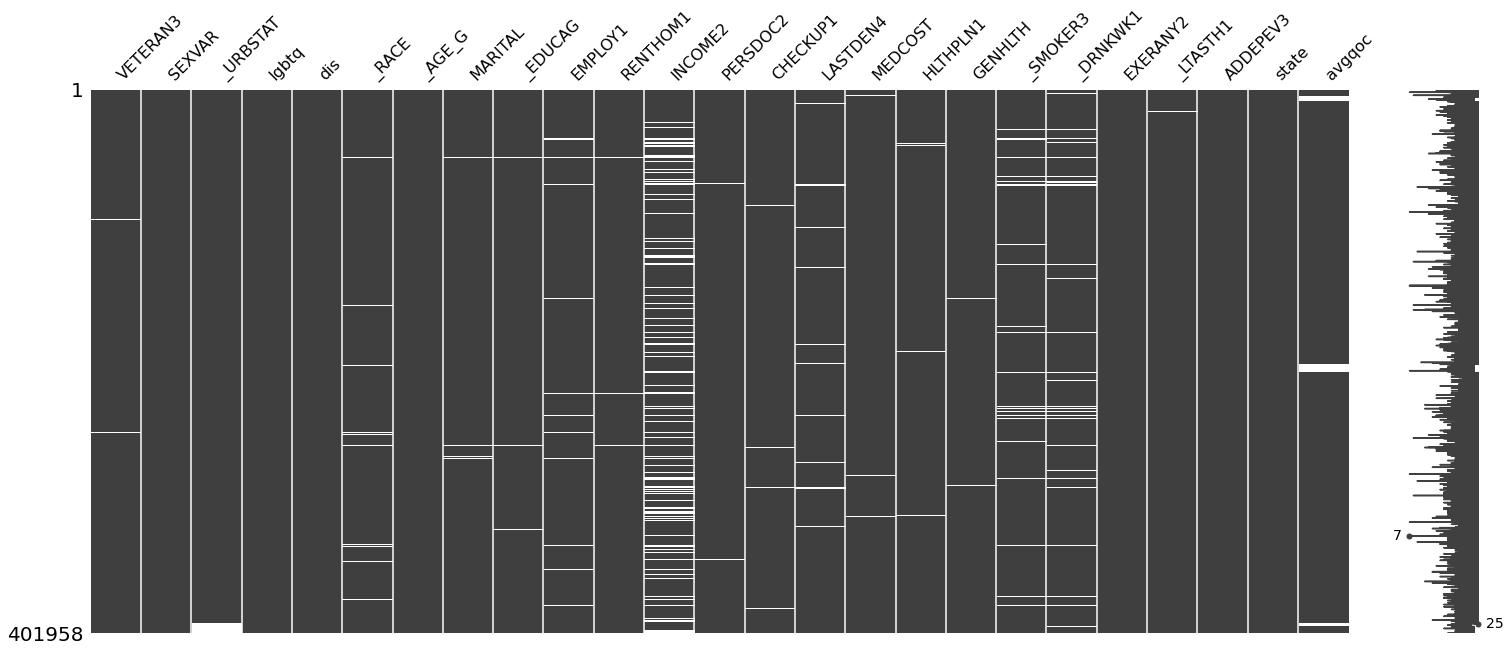

In [17]:
miss.matrix(dat) 

In [18]:
mar_dum = pd.get_dummies(dat["MARITAL"])
mar_dum= mar_dum.rename(columns={1: "married", 2: "divorced", 3:"widowed", 4:'separated', 5:'single', 6:'coupled'})
mar_dum = mar_dum.drop(['separated'],axis=1) #baseline
dat = pd.concat([dat.drop(['MARITAL'],axis=1),mar_dum],axis=1)


emp_dum = pd.get_dummies(dat["EMPLOY1"])
emp_dum= emp_dum.rename(columns={1: "employed", 2: "selfemployed", 3:"worklessover1", 4:'worklessunder1', 5:'homemaker', 6:'student',7:'retired',8:'unable'})
emp_dum = emp_dum.drop(['homemaker'],axis=1) #baseline
dat = pd.concat([dat.drop(['EMPLOY1'],axis=1),emp_dum],axis=1)


home_dum = pd.get_dummies(dat["RENTHOM1"])
home_dum= home_dum.rename(columns={1: "own", 2: "rent", 3:"other"})
home_dum = home_dum.drop(['other'],axis=1) #baseline
dat = pd.concat([dat.drop(['RENTHOM1'],axis=1),home_dum],axis=1)


race_dum = pd.get_dummies(dat["_RACE"])
race_dum= race_dum.rename(columns={1: "white", 2: "black", 3:"aian", 4:'asian', 5:'nhpi', 6:'other',7:'multi',8:'hispanic'})
race_dum = race_dum.drop(['nhpi'],axis=1) #baseline
dat = pd.concat([dat.drop(['_RACE'],axis=1), race_dum],axis=1)

C:\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 179960 rows containing non-finite values.


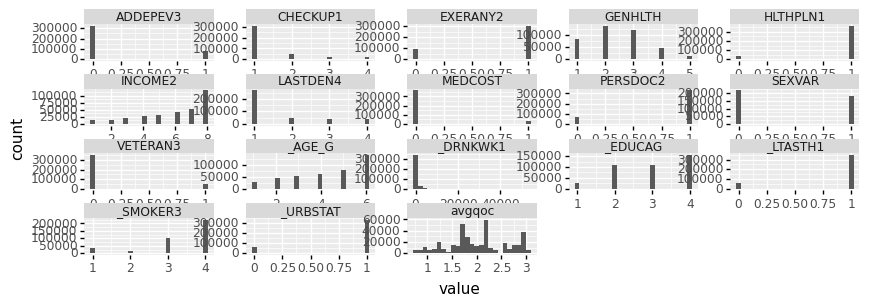

<ggplot: (143095002935)>

In [19]:
# Plot the continuous Variables 
d = dat.select_dtypes(include=("int64", "float64")).melt()
(
    ggplot(d,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25,
                           'hspace':0.75})
)

C:\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 30691 rows containing non-finite values.


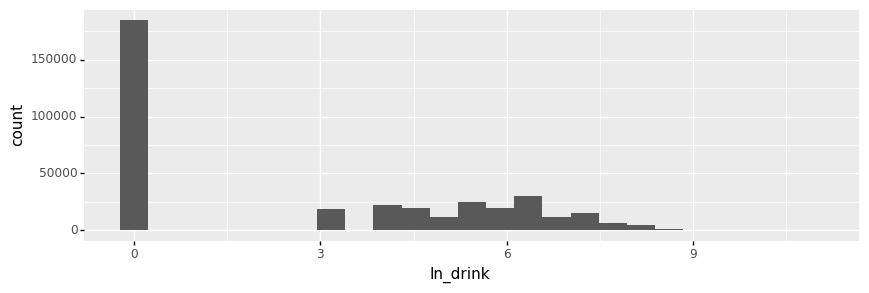

<ggplot: (143084884252)>

In [20]:
#drinking looks goofy so I'm going to try logging it

d = dat.copy()
d['ln_drink'] =  np.log(d['_DRNKWK1'] + 1)
(
    ggplot(d,aes(x="ln_drink")) +
    geom_histogram(bins=25) +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25})
)

In [21]:
#turning drinks/wk into a categorical variable because of that big chunk of people at 0
median_drink = dat.loc[dat['_DRNKWK1'] > 0,'_DRNKWK1'].median()
dat['drink'] =  np.where(dat['_DRNKWK1']==0,0,np.where(dat['_DRNKWK1'] <= median_drink,1,2))

In [22]:
#export merged data 
dat.to_csv('cleaned.csv', index=False)

23.0